In [54]:
import sys
sys.path.append('/home/sarju/.local/lib/python3.12/site-packages')

In [73]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse

In [111]:
CAFire = pd.read_csv("cleanedCAFire.csv", index_col="_id", low_memory=False)

In [128]:
CAFire

,OBJECTID,* Damage,* Street Number,* Street Name,"* Street Type (e.g. road, drive, lane, etc.)",* City,Zip Code,* CAL FIRE Unit,County,* Incident Name,...,* Patio Cover/Carport Attached to Structure,* Fence Attached to Structure,Distance - Propane Tank to Structure,Distance - Residence to Utility/Misc Structure &gt; 120 SQFT,Fire Name (Secondary),GLOBALID,Latitude,Longitude,x,y
_id,,,,,,,,,,,,,,,,,,,,,
1,1,0,8376.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,No Patio Cover/Carport,No Fence,NaN,NaN,Quail,e1919a06-b4c6-476d-99e5-f0b45b070de8,38.474960,-122.044465,-1.358593e+07,4.646741e+06
2,2,1,8402.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,No Patio Cover/Carport,Combustible,NaN,NaN,Quail,b090eeb6-5b18-421e-9723-af7c9144587c,38.477442,-122.043252,-1.358579e+07,4.647094e+06
3,3,0,8430.0,Quail Canyon,Road,Winters,NaN,LNU,Solano,Quail,...,No Patio Cover/Carport,No Fence,NaN,NaN,Quail,268da70b-753f-46aa-8fb1-327099337395,38.479358,-122.044585,-1.358594e+07,4.647366e+06
4,4,0,3838.0,Putah Creek,Road,Winters,NaN,LNU,Solano,Quail,...,Combustible,No Fence,NaN,NaN,Quail,64d4a278-5ee9-414a-8bf4-247c5b5c60f9,38.487313,-122.015115,-1.358266e+07,4.648497e+06
5,5,0,3830.0,Putah Creek,Road,Winters,NaN,LNU,Solano,Quail,...,Combustible,No Fence,NaN,NaN,Quail,1b44b214-01fd-4f06-b764-eb42a1ec93d7,38.485636,-122.016122,-1.358277e+07,4.648259e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100226,101217,0,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,Non Combustible,No Fence,NaN,NaN,NaN,1b537de2-8b97-43ee-9d5c-c5a426f604f1,34.033408,-118.700625,-1.321369e+07,4.033289e+06
100227,101218,0,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,No Patio Cover/Carport,No Fence,NaN,NaN,NaN,56e3cc8b-4bf0-4beb-bd26-b54422cc31ee,34.033278,-118.700902,-1.321372e+07,4.033271e+06
100228,101219,0,24198.0,Case,Court,Malibu,90265.0,LAC,Los Angeles,Franklin,...,Unknown,Unknown,NaN,NaN,NaN,f85e9f02-a67f-4a7d-9fa1-0b8bf419d51a,34.033618,-118.701102,-1.321375e+07,4.033317e+06


In [112]:
CAFire.columns

Index(['OBJECTID', '* Damage', '* Street Number', '* Street Name',
       '* Street Type (e.g. road, drive, lane, etc.)', '* City', 'Zip Code',
       '* CAL FIRE Unit', 'County', '* Incident Name',
       'Incident Number (e.g. CAAEU 123456)', 'Incident Start Date',
       'If Affected 1-9% - Where did fire start?',
       'If Affected 1-9% - What started fire?',
       'Structure Defense Actions Taken', '* Structure Type',
       'Structure Category', '# Units in Structure (if multi unit)',
       '# of Damaged Outbuildings < 120 SQFT',
       '# of Non Damaged Outbuildings < 120 SQFT', '* Roof Construction',
       '* Eaves', '* Vent Screen', '* Exterior Siding', '* Window Pane',
       '* Deck/Porch On Grade', '* Deck/Porch Elevated',
       '* Patio Cover/Carport Attached to Structure',
       '* Fence Attached to Structure', 'Distance - Propane Tank to Structure',
       'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
       'Fire Name (Secondary)', 'GLOBALID', 'L

In [114]:
# This makes the categorical values of damage column into numeric for bar chart
category_mapping = {
    'No Damage': 0,
    'Affected (1-9%)': 1,
    'Minor (10-25%)': 2,
    'Destroyed (>50%)': 3,
    'Major (26-50%)': 4,
    'Inaccessible': 5
}

CAFire['* Damage'] = CAFire['* Damage'].map(category_mapping)

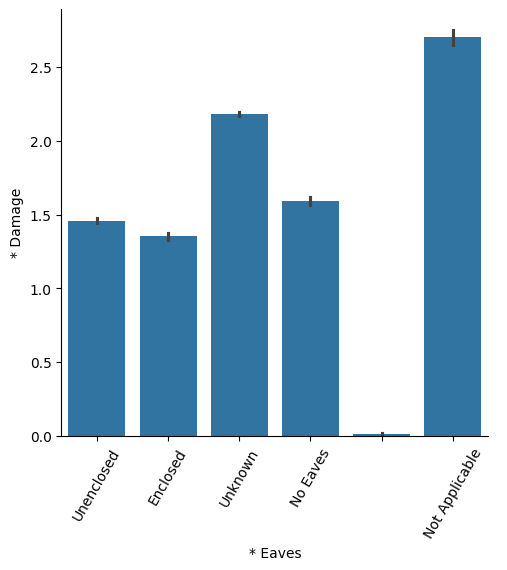

In [120]:
# Compares the eaves column to damage
plot = sns.catplot(CAFire, x="* Eaves", y="* Damage", kind="bar")
plot.tick_params(axis="x", rotation=60)

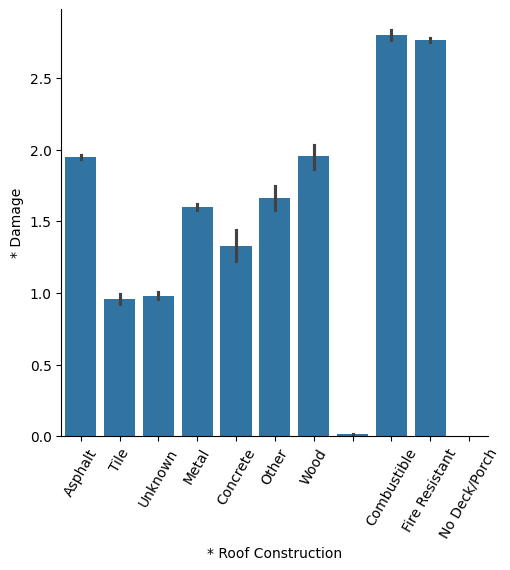

In [119]:
# Compares the roof construction column to damage
plot = sns.catplot(CAFire, x="* Roof Construction", y="* Damage", kind="bar")
plot.tick_params(axis="x", rotation=60)

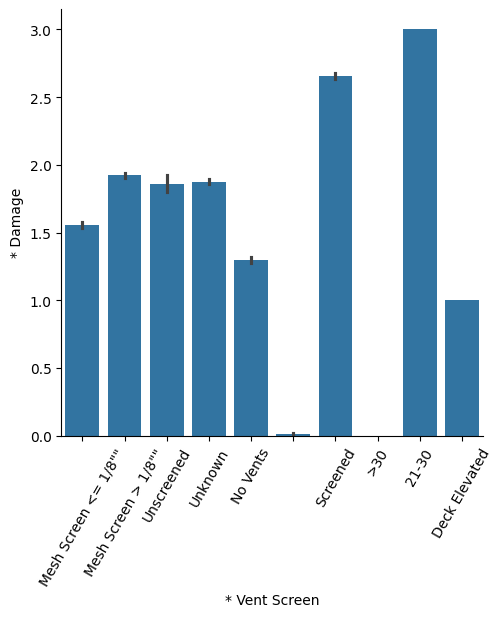

In [121]:
# Compares the vent screen column to damage
plot = sns.catplot(CAFire, x="* Vent Screen", y="* Damage", kind="bar")
plot.tick_params(axis="x", rotation=60)

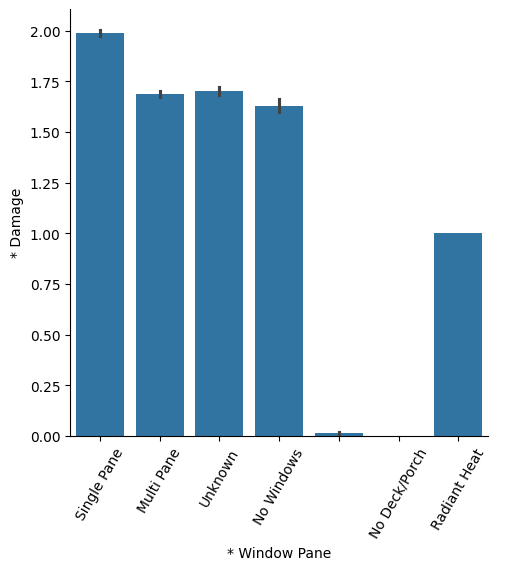

In [122]:
# Compares the window pane column to damage
plot = sns.catplot(CAFire, x="* Window Pane", y="* Damage", kind="bar")
plot.tick_params(axis="x", rotation=60)

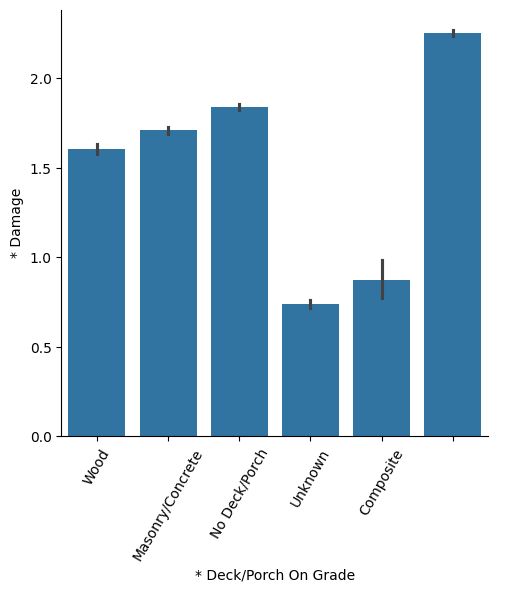

In [123]:
# Compares the deck material column to damage
plot = sns.catplot(CAFire, x="* Deck/Porch On Grade", y="* Damage", kind="bar")
plot.tick_params(axis="x", rotation=60)

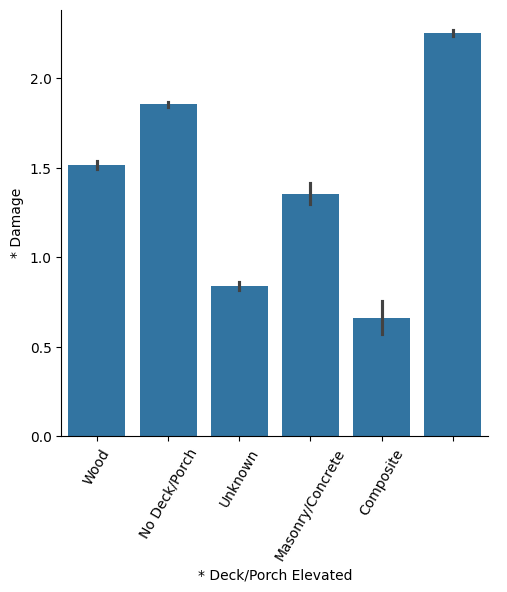

In [124]:
# Compares the deck elevated column to damage
plot = sns.catplot(CAFire, x="* Deck/Porch Elevated", y="* Damage", kind="bar")
plot.tick_params(axis="x", rotation=60)

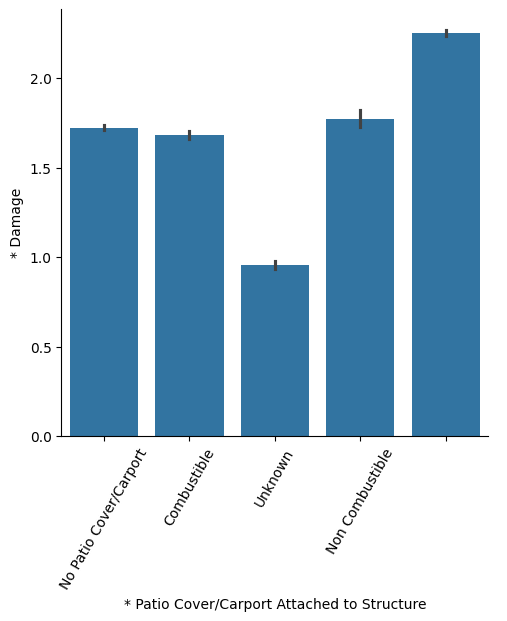

In [125]:
# Compares the patio cover column to damage
plot = sns.catplot(CAFire, x="* Patio Cover/Carport Attached to Structure", y="* Damage", kind="bar")
plot.tick_params(axis="x", rotation=60)

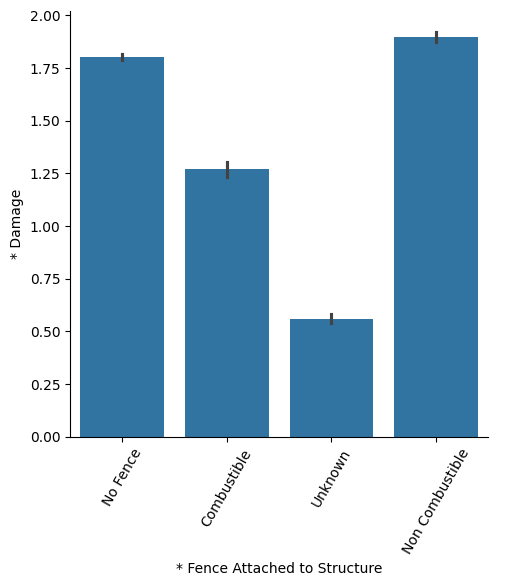

In [127]:
# Compares the fence column to damage
plot = sns.catplot(CAFire, x="* Fence Attached to Structure", y="* Damage", kind="bar")
plot.tick_params(axis="x", rotation=60)